#  ASSIGNMENT 2

ACKNOWLEDGEMENT                                            
1)Geeks for Geeks (Used for Plotting)              
2)Youtube(Used for Method/Concept)                                  
3)ChatGpt(Used for Spltting trainning error and testing error & regularization)

Part 1 Ploting the Graph of (Displacement vs Time) of Simple Spring Mass System

Part 2 Plotting the training and testing error with respect to the degree of polynomial.

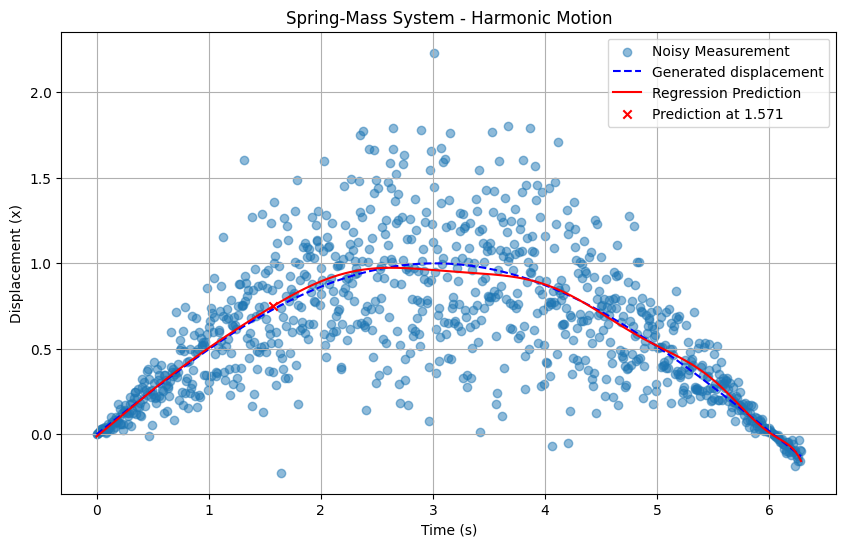

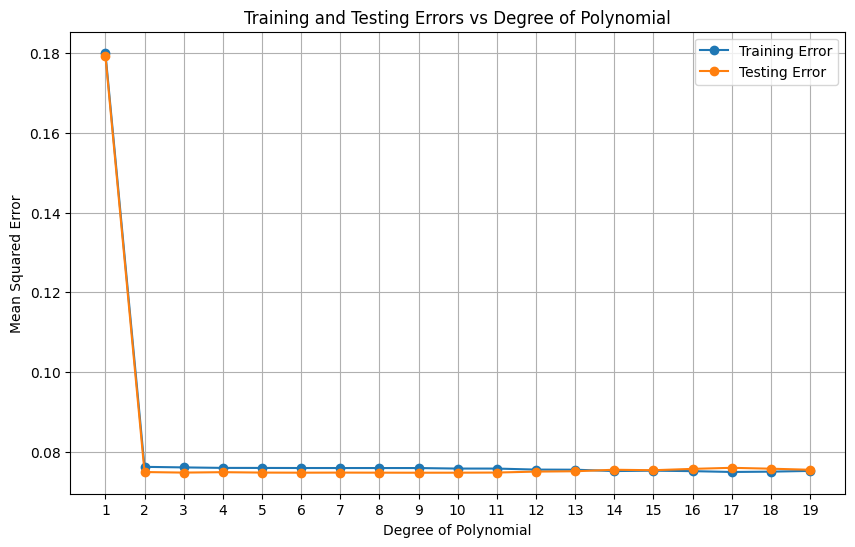

Optimal Degree of Polynomial: 9
Underfitting Region: [1, 2, 3, 4, 5, 6, 7, 8]
Overfitting Region: [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#basis function
def basisfunctions(x, degree):
    basis_matrix = np.column_stack([x ** i for i in range(degree + 1)])
    return basis_matrix

#Function to calculte the coefficients of polynomial regression
def polynomialregression(x, y, degree):
    basismatrix = basisfunctions(x, degree)
    coefficients = np.linalg.lstsq(basismatrix, y, rcond=None)[0]
    return coefficients
#predicring at any arbitary point
def prediction(x, coefficients):
    basismatrix = basisfunctions(x, len(coefficients) - 1)
    predictions = np.dot(basismatrix, coefficients)
    return predictions
#constants
k = 13       #Stiffness
m = 48       #Mass
damping = 0.1   #damping coefficient
error = 40 #Measurement error percentage

#getting the random data values
np.random.seed(42)
time = np.linspace(0, 2 * np.pi, 1000)
w = np.sqrt(k / m)  #angular frequency
displacementcycle = np.sin(w* time) #x=sin(wt)

#adding noise
measurementerror = np.random.normal(0, np.abs(error / 100 *displacementcycle))
noisydisplacement = displacementcycle + measurementerror

#regression with polynomials
degree =14  #we can change the degree of polynomial from here
coefficients = polynomialregression(time, noisydisplacement, degree)

#pedicting displacement at an arbitrary time
arbitrarytime = np.pi / 2  # Example: within the first quarter of the cycle
predicteddisplacement = prediction(np.array([arbitrarytime]), coefficients)

#Ploting
plt.figure(figsize=(10, 6))
plt.scatter(time, noisydisplacement, label='Noisy Measurement', alpha=0.5)
plt.plot(time, displacementcycle, label='Generated displacement', linestyle='--', color='blue')
plt.plot(time, prediction(time, coefficients), label='Regression Prediction', color='red')
plt.scatter([arbitrarytime], predicteddisplacement, color='red', marker='x', label=f'Prediction at {arbitrarytime:.3f}')
plt.title('Spring-Mass System - Harmonic Motion')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.legend()
plt.grid(True)
plt.show()

# Now to plot training error, Testing Error vs Degree of polynomial to find underfitting region and over fitting region
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Spliting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(time, noisydisplacement, test_size=0.3, random_state=42)

#range of polynomial degrees to try fir  seeing underfitting and overfitting
degrees = np.arange(1, 20)

# to store training and testing errors
train_errors = []
test_errors = []

#errors for each degree in the range
for degree in degrees:
    #Transforming features to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

    #Fitting in  polynomial regression model
    model=LinearRegression()
    model.fit(X_train_poly, y_train)

    # [predictions on training and testing sets
    y_train_pred=model.predict(X_train_poly)
    y_test_pred=model.predict(X_test_poly)

    # mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)       # adding the error value at the end
    test_errors.append(test_error)

# Ploting training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.title('Training and Testing Errors vs Degree of Polynomial')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

# optimal degree of polynomial
optimal_degree = degrees[np.argmin(test_errors)]
print(f'Optimal Degree of Polynomial: {optimal_degree}')

# underfitting and overfitting regions
overfitting_region = degrees[test_errors.index(min(test_errors)):].tolist()
underfitting_region = degrees[:test_errors.index(min(test_errors))].tolist()

print(f'Underfitting Region: {underfitting_region}')
print(f'Overfitting Region: {overfitting_region}')




Part 3 Taking highest noise And taking
the polynomial degree that lies in the over fitting region.

ERROR=15 Percent                                                              
Degree =18

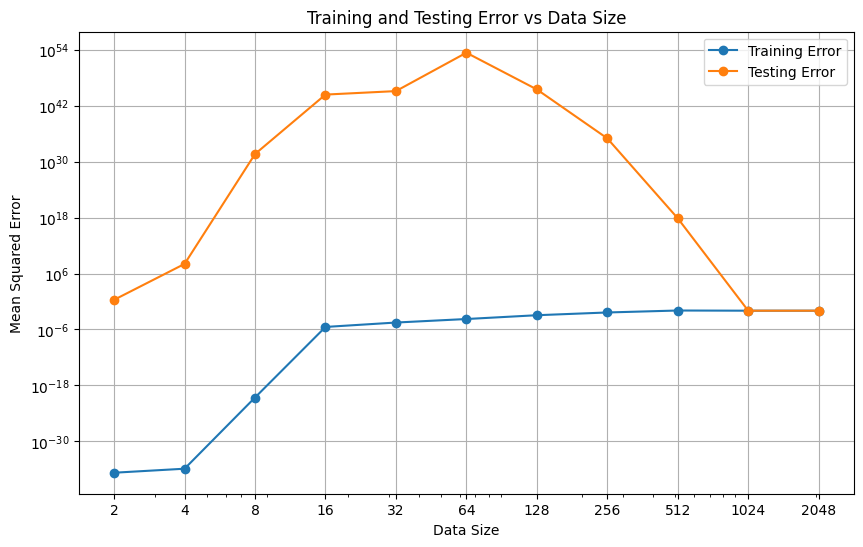

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#polynomial regression function
def polynomialregression(x, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    return model

#prediction function
def prediction(x, model, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    return model.predict(X_poly)

# Basis function
def basisfunctions(x, degree):
    basis_matrix = np.column_stack([x ** i for i in range(degree + 1)])
    return basis_matrix

# Generating noise
def generate_noisy_data(k, m, error):
    np.random.seed(42)
    time = np.linspace(0, 2 * np.pi, 1000)
    w = np.sqrt(k / m)
    displacementcycle = np.sin(w * time)
    measurementerror = np.random.normal(0, np.abs(error / 100 * displacementcycle))
    noisydisplacement = displacementcycle + measurementerror
    return time, noisydisplacement

#Constants
k=13    #stiffness
m=48    #mass
error=15  #error

#Generate noisy data
time,noisydisplacement=generate_noisy_data(k, m, error)

#spliting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(time,noisydisplacement,test_size=0.3,random_state=42)

#Range of polynomial degrees to try
degrees=np.arange(1, 20)

#geometric pogression for data size
data_sizes=[2**i for i in range(1, 12)]

#Lists to store training and testing errors
training_errors = []
testing_errors = []

for size in data_sizes:
    x_train = time[:size]
    y_train = noisydisplacement[:size]
    model = polynomialregression(x_train, y_train, 18)
    y_train_pred = prediction(x_train, model, 18)
    y_test_pred = prediction(X_test, model, 18)

    #training and testing errors
    training_error = mean_squared_error(y_train, y_train_pred)
    testing_error = mean_squared_error(y_test, y_test_pred)

    training_errors.append(training_error) #adding error at end of list
    testing_errors.append(testing_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, training_errors, label='Training Error', marker='o')
plt.plot(data_sizes, testing_errors, label='Testing Error', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Training and Testing Error vs Data Size')
plt.xlabel('Data Size')
plt.ylabel('Mean Squared Error')
plt.xticks(data_sizes, labels=[str(size) for size in data_sizes])
plt.legend()
plt.grid(True)
plt.show()


Part 4 L2 Regularization

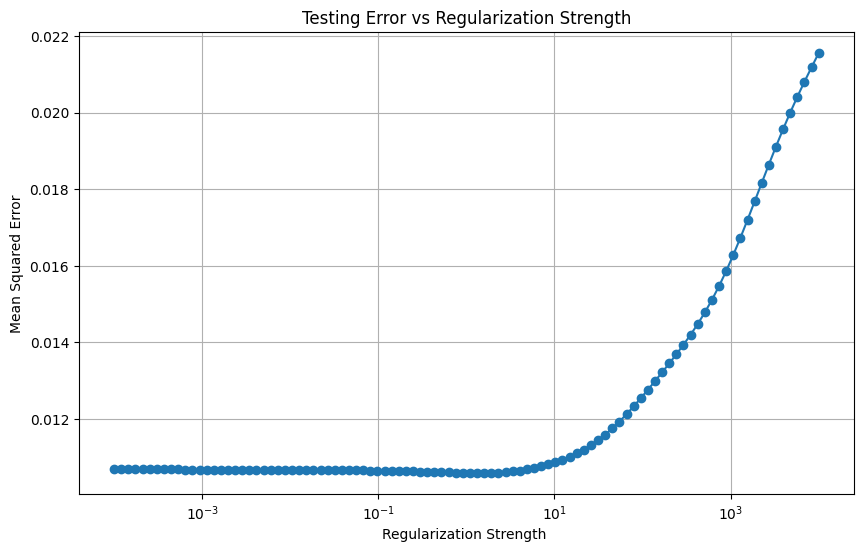

Optimal Regularization Strength 1.3219411484660315


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#generating noisy data
def generate_noisy_data(k,m,error):
    np.random.seed(42)
    time = np.linspace(0,2*np.pi,1000)
    w = np.sqrt(k/m)
    displacementcycle=np.sin(w*time)
    measurementerror=np.random.normal(0,np.abs(error/100 *displacementcycle))
    noisydisplacement=displacementcycle + measurementerror
    return time, noisydisplacement

# Constants
k=13  #stiffness
m=48  #mass
error=15  # Measurement error percentage

#Generate noisy data
time,noisydisplacement=generate_noisy_data(k, m, error)

# dividing data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(time,noisydisplacement,test_size=0.3, random_state=42)

#Range of regularization
alphas = np.logspace(-4, 4, 100)  # Varying lambda logarithmically from 0.0001 to 10000

#degree
degree = 18

# Lists to store testing errors for different values of lambda
testing_errors = []

#iterating over different values of lambda
for alpha in alphas:
    # Polynomial feature transformation
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly_features.transform(X_test.reshape(-1, 1))

    #ridge regression model with L2 regularization
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly_train, y_train)

    # Predictions on testing set
    y_test_pred = ridge_model.predict(X_poly_test)

    # Calculating the testing error
    testing_error = mean_squared_error(y_test, y_test_pred)
    testing_errors.append(testing_error)

# Ploting testing error vs regularization strength
plt.figure(figsize=(10, 6))
plt.plot(alphas, testing_errors, label='Testing Error', marker='o')
plt.xlabel('Regularization Strength ')
plt.ylabel('Mean Squared Error')
plt.title('Testing Error vs Regularization Strength')
plt.xscale('log')
plt.grid(True)
plt.show()

#optimal regularization strength is
optimal_alpha = alphas[np.argmin(testing_errors)]
print(f'Optimal Regularization Strength {optimal_alpha}')
